In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 4, cluster_std = 1.5, random_state = 4)
print(X)
print(y)

[[ 10.13105098  -9.81665726]
 [  9.69199316   5.47078322]
 [  8.43026586   3.26511398]
 [  8.47592686   5.09679909]
 [ 10.26860131   0.81266459]
 [  2.24341673  -4.00528224]
 [ 11.08687812   1.30863522]
 [  2.78369887  -3.67391407]
 [  9.08789003   6.69196083]
 [  8.38646041 -13.51357423]
 [  4.72252161  -4.89674361]
 [ 10.81316277   0.59069431]
 [ 10.2792478  -10.71497092]
 [  7.72766164   3.97825258]
 [ 10.55485244 -10.61685598]
 [ 10.35129902   2.48432744]
 [ 11.62258649   4.31500984]
 [  2.36481944  -6.5932803 ]
 [  9.04022027   5.24509157]
 [  3.49038333  -5.39890422]
 [ 11.16257799 -11.01212818]
 [ 10.6333549   -9.94142734]
 [  1.36794067  -6.94740231]
 [ -0.08814428  -4.08406737]
 [  3.25342201  -6.8733241 ]
 [  9.83897183  -0.77656997]
 [  9.49879595  -8.72097195]
 [  9.06994475   3.76490633]
 [  9.88155376  -1.32771147]
 [  4.09786368  -6.00301315]
 [  9.70696643   5.51464701]
 [  9.96214561  -9.30216057]
 [  9.38389897 -10.70922239]
 [  9.13438834   3.66254374]
 [  9.53395597

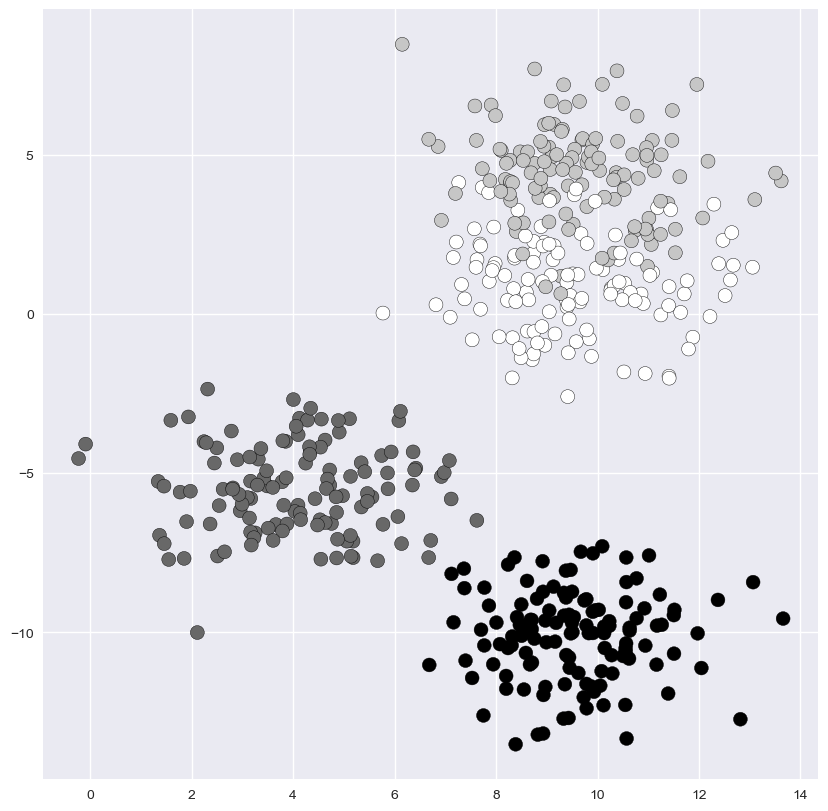

In [3]:
plt.style.use("seaborn")
plt.figure(figsize = (10,10))
plt.scatter(X[:,0], X[:,1], c = y, s=100, edgecolors='black')
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [5]:
print(y_train)

[2 3 2 3 0 0 2 1 2 2 2 2 0 1 0 0 2 2 2 2 1 1 3 0 3 3 2 0 3 2 1 1 3 3 1 0 2
 2 3 2 1 3 3 3 1 0 0 1 1 2 3 3 0 0 2 2 1 3 2 3 2 0 0 0 0 3 2 2 3 3 0 2 2 0
 1 0 1 0 1 2 3 3 2 1 1 1 1 0 1 1 1 3 2 0 1 3 3 1 1 1 2 0 2 2 2 3 1 1 1 3 0
 1 1 0 0 0 2 2 1 1 1 0 0 0 0 1 2 3 1 0 1 1 2 1 3 1 1 1 3 2 3 1 0 0 0 3 0 1
 3 1 0 2 3 3 3 0 0 1 1 3 0 2 2 2 0 1 0 0 1 2 0 3 1 2 2 2 1 2 0 3 3 0 0 1 3
 3 3 2 2 2 1 3 1 2 1 0 0 2 2 1 3 3 0 3 2 2 2 0 2 1 3 2 2 2 1 2 0 3 2 1 0 3
 0 2 3 1 3 2 0 2 0 1 0 1 2 3 2 3 3 0 1 2 3 1 3 0 3 0 3 0 0 1 2 0 3 2 3 3 2
 2 1 1 1 2 0 1 0 3 2 1 2 1 0 3 0 3 1 1 3 0 2 1 3 2 2 1 0 3 2 0 0 2 3 3 3 0
 2 1 0 3 0 0 1 0 1 1 2 0 2 2 2 1 0 1 3 1 0 3 2 2 1 0 2 3 3 2 1 2 3 3 2 3 1
 2 2 2 0 1 3 0 0 0 3 1 0 3 3 3 3 0 3 0 1 0 0 2 1 1 1 2 0 0 3 2 1 1 2 1 1 3
 0 0 1 0 2 0 3 2 0 2 2 1 3 0 1 1 3 2 0 3 2 3 1 3 0 1 2 0 1 3]


In [6]:
print(y_test)

[3 0 3 2 0 0 1 2 0 3 0 1 1 3 3 3 0 3 2 1 1 0 1 3 2 3 3 3 3 0 2 0 2 0 2 3 0
 2 1 3 3 1 2 1 1 1 1 3 0 0 1 2 1 2 1 3 3 2 1 0 1 0 1 3 3 3 2 3 2 3 0 2 3 0
 1 3 3 3 2 0 3 2 0 1 1 0 0 0 1 2 3 1 0 3 0 2 2 2 3 0]


In [7]:
num = 0
index = 0
predKnn1 = 0
predBestKnn = 0
for i in range(1, 201):
    knn1 = KNeighborsClassifier(n_neighbors=1)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn1.fit(X_train, y_train)
    predKnn1 = knn1.predict(X_test)
    pred = knn.predict(X_test)
    prevNum = num
    num = accuracy_score(y_test, pred)*100
    print("k: ", i, "  " ,num)
    if(prevNum > num): 
        num = prevNum
        prevNum = num 
    else: 
        index = i
        predBestKnn = pred
print("BiggestNum: ", num)

k:  1    89.0
k:  2    93.0
k:  3    93.0
k:  4    93.0
k:  5    92.0
k:  6    93.0
k:  7    94.0
k:  8    93.0
k:  9    94.0
k:  10    94.0
k:  11    94.0
k:  12    94.0
k:  13    93.0
k:  14    94.0
k:  15    93.0
k:  16    94.0
k:  17    94.0
k:  18    94.0
k:  19    94.0
k:  20    95.0
k:  21    96.0
k:  22    95.0
k:  23    95.0
k:  24    95.0
k:  25    96.0
k:  26    97.0
k:  27    96.0
k:  28    97.0
k:  29    96.0
k:  30    97.0
k:  31    96.0
k:  32    96.0
k:  33    96.0
k:  34    96.0
k:  35    96.0
k:  36    96.0
k:  37    96.0
k:  38    96.0
k:  39    96.0
k:  40    96.0
k:  41    96.0
k:  42    96.0


c:\Users\pedro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\pedro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

k:  43    96.0
k:  44    96.0
k:  45    96.0
k:  46    96.0
k:  47    96.0
k:  48    97.0
k:  49    96.0
k:  50    96.0
k:  51    96.0
k:  52    96.0
k:  53    96.0
k:  54    97.0
k:  55    97.0
k:  56    97.0
k:  57    96.0
k:  58    96.0
k:  59    96.0
k:  60    96.0
k:  61    96.0
k:  62    96.0
k:  63    96.0
k:  64    96.0
k:  65    96.0
k:  66    96.0
k:  67    96.0
k:  68    96.0
k:  69    96.0
k:  70    96.0
k:  71    96.0
k:  72    96.0
k:  73    96.0
k:  74    97.0
k:  75    97.0
k:  76    97.0
k:  77    97.0
k:  78    97.0
k:  79    96.0
k:  80    96.0
k:  81    96.0
k:  82    96.0
k:  83    96.0
k:  84    97.0
k:  85    97.0
k:  86    97.0
k:  87    95.0
k:  88    95.0
k:  89    95.0
k:  90    95.0
k:  91    95.0
k:  92    96.0
k:  93    96.0


c:\Users\pedro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\pedro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

k:  94    97.0
k:  95    95.0
k:  96    95.0
k:  97    95.0
k:  98    94.0
k:  99    95.0
k:  100    95.0
k:  101    95.0
k:  102    97.0
k:  103    97.0
k:  104    97.0
k:  105    97.0
k:  106    97.0
k:  107    95.0
k:  108    96.0
k:  109    95.0
k:  110    96.0
k:  111    95.0
k:  112    95.0
k:  113    95.0
k:  114    96.0
k:  115    96.0
k:  116    96.0
k:  117    96.0
k:  118    96.0
k:  119    96.0
k:  120    96.0
k:  121    95.0
k:  122    95.0
k:  123    95.0
k:  124    95.0
k:  125    95.0
k:  126    95.0
k:  127    95.0
k:  128    96.0
k:  129    96.0
k:  130    96.0
k:  131    96.0
k:  132    96.0
k:  133    96.0
k:  134    96.0
k:  135    96.0
k:  136    96.0
k:  137    95.0
k:  138    96.0
k:  139    96.0


c:\Users\pedro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\pedro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

k:  140    96.0
k:  141    95.0
k:  142    95.0
k:  143    95.0
k:  144    95.0
k:  145    95.0
k:  146    95.0
k:  147    95.0
k:  148    95.0
k:  149    95.0
k:  150    95.0
k:  151    95.0
k:  152    95.0
k:  153    95.0
k:  154    95.0
k:  155    95.0
k:  156    95.0
k:  157    95.0
k:  158    95.0
k:  159    95.0
k:  160    95.0
k:  161    94.0
k:  162    94.0
k:  163    94.0
k:  164    95.0
k:  165    95.0
k:  166    95.0
k:  167    94.0
k:  168    95.0
k:  169    94.0
k:  170    94.0
k:  171    94.0
k:  172    95.0
k:  173    95.0
k:  174    96.0
k:  175    96.0
k:  176    96.0
k:  177    95.0
k:  178    95.0
k:  179    95.0
k:  180    95.0
k:  181    95.0
k:  182    96.0
k:  183    95.0
k:  184    96.0
k:  185    96.0
k:  186    96.0
k:  187    95.0


c:\Users\pedro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\pedro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

k:  188    93.0
k:  189    91.0
k:  190    87.0
k:  191    87.0
k:  192    87.0
k:  193    87.0
k:  194    87.0
k:  195    85.0
k:  196    84.0
k:  197    81.0
k:  198    81.0
k:  199    81.0
k:  200    81.0
BiggestNum:  97.0


c:\Users\pedro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\pedro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [8]:
print(f"Accuracy with k={index}: ", num)

Accuracy with k=106:  97.0


Text(0.5, 1.0, 'Predicted values with k=1 with acc=89.0')

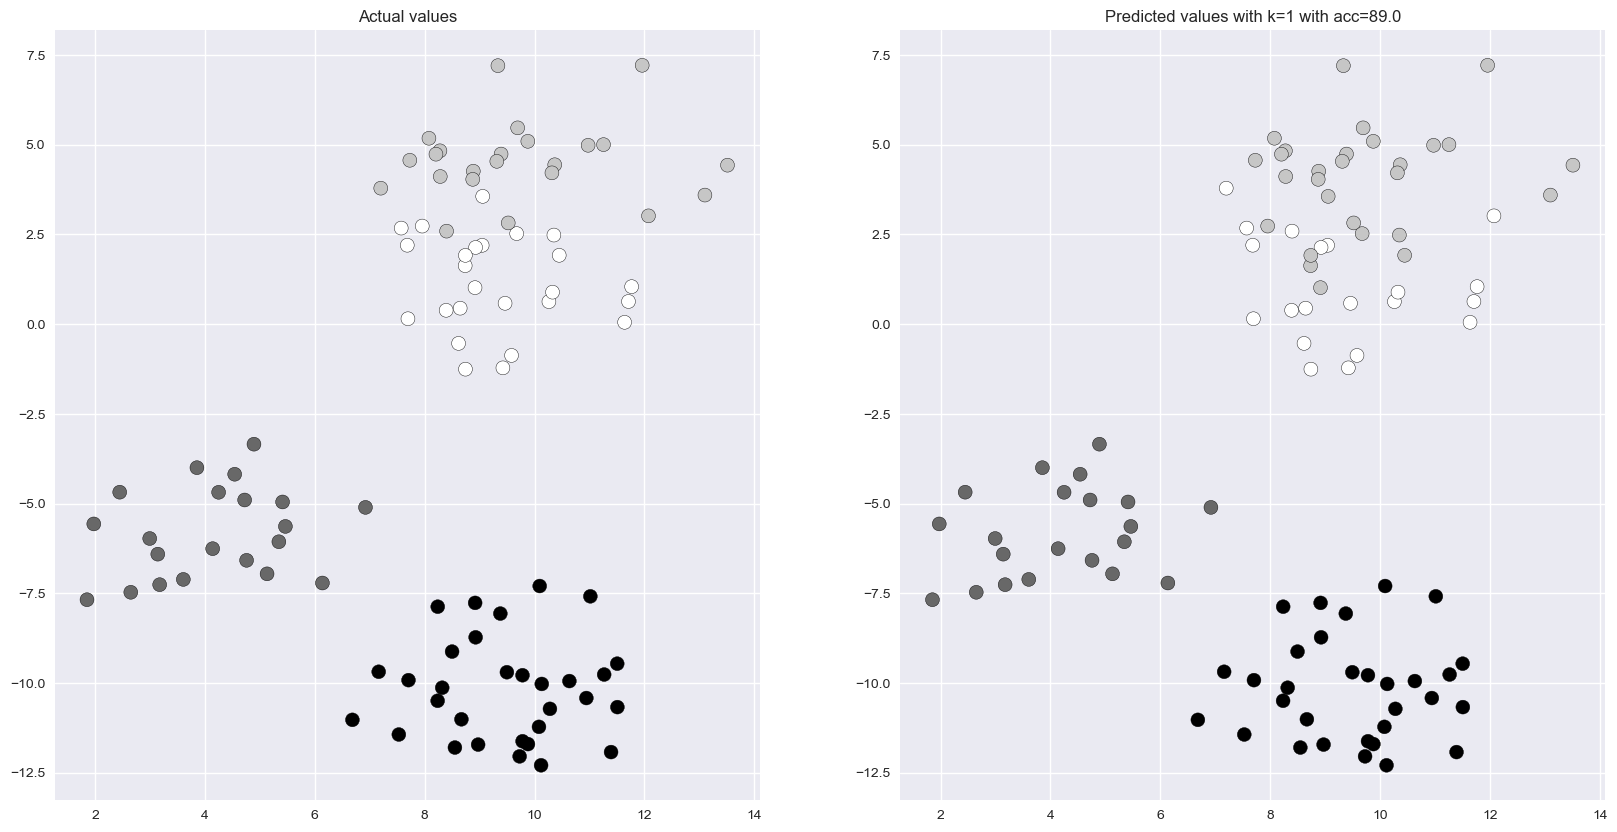

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.scatter(X_test[:,0], X_test[:,1], c = y_test, s = 100, edgecolors="black")
ax1.set_title(f"Actual values")
ax2.scatter(X_test[:,0], X_test[:,1], c = predKnn1, s = 100, edgecolors="black")
ax2.set_title(f"Predicted values with k=1 with acc={accuracy_score(y_test, predKnn1)*100}")

Text(0.5, 1.0, 'Predicted values with k=106 with acc=97.0')

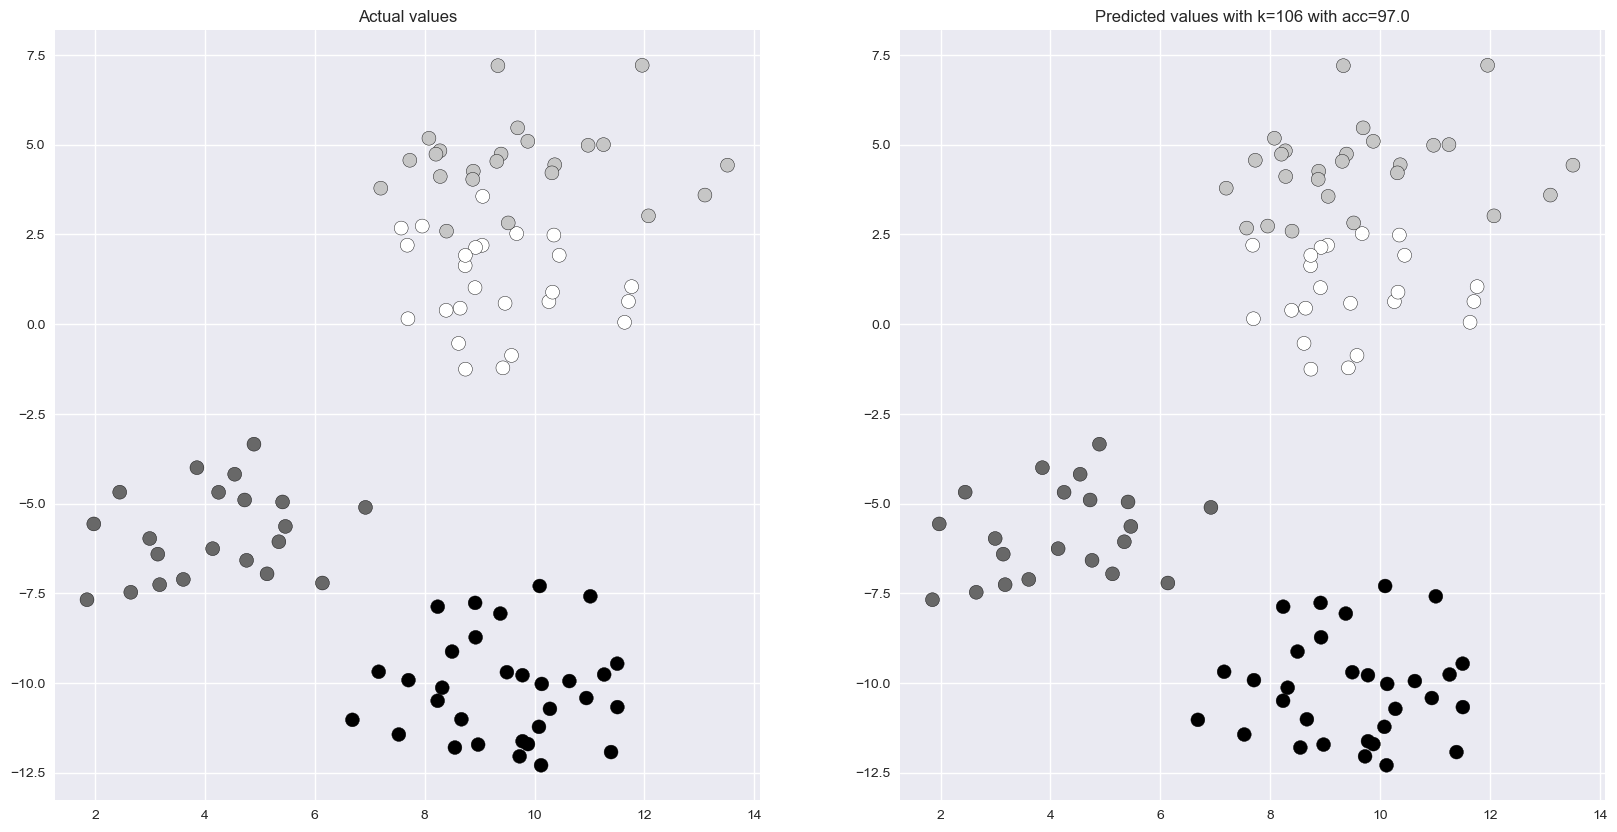

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.scatter(X_test[:,0], X_test[:,1], c = y_test, s = 100, edgecolors="black")
ax1.set_title(f"Actual values")
ax2.scatter(X_test[:,0], X_test[:,1], c = predBestKnn, s = 100, edgecolors="black")
ax2.set_title(f"Predicted values with k={index} with acc={num}")